## 패션의류, 패션잡화, 화장품/미용 분야 클릭량 데이터 분석

In [1]:
import pandas as pd
import os

DATA_PATH = './fc_fa_m_data/'

os.listdir(DATA_PATH)

['남성_10대.csv',
 '남성_20대.csv',
 '남성_30대.csv',
 '남성_40대.csv',
 '남성_50대.csv',
 '남성_60대_이상.csv',
 '여성_10대.csv',
 '여성_20대.csv',
 '여성_30대.csv',
 '여성_40대.csv',
 '여성_50대.csv',
 '여성_60대_이상.csv']

In [2]:
test = pd.read_csv(DATA_PATH + os.listdir(DATA_PATH)[0], skiprows=10, index_col=0)

In [3]:
total_fashion_cloth = pd.DataFrame(index = test.index)
total_fashion_acc = pd.DataFrame(index = test.index)
total_makeup = pd.DataFrame(index = test.index)

for file_name in os.listdir(DATA_PATH):
    file = pd.read_csv(DATA_PATH + file_name, skiprows=10, index_col=0)
    
    total_fashion_cloth.insert(0, file_name.split('.')[0], file[['패션의류']])
    total_fashion_acc.insert(0, file_name.split('.')[0], file[['패션잡화']])
    total_makeup.insert(0, file_name.split('.')[0], file[['화장품/미용']])
    


In [4]:
total_makeup

,여성_60대_이상,여성_50대,여성_40대,여성_30대,여성_20대,여성_10대,남성_60대_이상,남성_50대,남성_40대,남성_30대,남성_20대,남성_10대
날짜,,,,,,,,,,,,
2021-07-09,11,10,10,13,18,15,12,9,7,9,11,4
2021-07-10,12,12,11,14,19,21,13,10,7,9,11,4
2021-07-11,13,13,14,17,23,25,14,11,8,12,14,5
2021-07-12,12,12,13,17,23,20,14,10,9,12,15,5
2021-07-13,14,13,13,17,23,19,14,11,8,12,14,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-05,19,17,16,17,21,14,21,14,10,14,17,4
2022-07-06,19,16,15,17,21,14,21,13,10,14,18,4
2022-07-07,19,16,14,16,20,13,20,13,9,13,17,4


In [5]:
datas = [total_fashion_cloth, total_fashion_acc, total_makeup]
data_names = ['패션의류', '패션잡화', '화장품/미용']
for i, data in enumerate(datas):
    print(f'''
{data_names[i]}    -----------------
index :
{data.index}
    
columns : 
{data.columns}
    
    
info : 
{data.info}
    ''')


패션의류    -----------------
index :
Index(['2021-07-09', '2021-07-10', '2021-07-11', '2021-07-12', '2021-07-13',
       '2021-07-14', '2021-07-15', '2021-07-16', '2021-07-17', '2021-07-18',
       ...
       '2022-06-30', '2022-07-01', '2022-07-02', '2022-07-03', '2022-07-04',
       '2022-07-05', '2022-07-06', '2022-07-07', '2022-07-08', '2022-07-09'],
      dtype='object', name='날짜', length=366)
    
columns : 
Index(['여성_60대_이상', '여성_50대', '여성_40대', '여성_30대', '여성_20대', '여성_10대',
       '남성_60대_이상', '남성_50대', '남성_40대', '남성_30대', '남성_20대', '남성_10대'],
      dtype='object')
    
    
info : 
<bound method DataFrame.info of             여성_60대_이상  여성_50대  여성_40대  여성_30대  여성_20대  여성_10대  남성_60대_이상  \
날짜                                                                         
2021-07-09         49      50      43      40      33      22         43   
2021-07-10         55      62      53      46      38      30         47   
2021-07-11         59      67      60      56      48      36      

In [6]:
for i in range(3):
    datas[i].to_csv('./naver_shopping/'+data_names[i].replace('/','_')+'.csv')

In [7]:
def grouping(data, kind):
    if kind == 'gender':
        groups = ['남성', '여성']
    elif kind =='age':
        groups = [str(x) + '대' for x in list(range(10,70,10))]
    
    
    df = pd.DataFrame(index = data.index)
    for group in groups:
        g_data = data.filter(like= group)
        g_sum = g_data.apply(sum, axis =1)
        df.insert(0, group, g_sum.to_frame())
    return df
        
        

In [8]:
grouping(total_fashion_cloth, 'gender')

,여성,남성
날짜,,
2021-07-09,237,208
2021-07-10,284,240
2021-07-11,326,289
2021-07-12,283,268
2021-07-13,291,273
...,...,...
2022-07-05,345,284
2022-07-06,344,280
2022-07-07,327,263


In [9]:
grouping(total_fashion_cloth, 'gender')

,여성,남성
날짜,,
2021-07-09,237,208
2021-07-10,284,240
2021-07-11,326,289
2021-07-12,283,268
2021-07-13,291,273
...,...,...
2022-07-05,345,284
2022-07-06,344,280
2022-07-07,327,263


In [10]:
# 폰트
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rc

font_path = './Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

# plt.rc('font', size=20)        # 기본 폰트 크기
# plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
# plt.rc('xtick', labelsize=50)  # x축 눈금 폰트 크기 
# plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
# plt.rc('legend', fontsize=20)  # 범례 폰트 크기
# plt.rc('figure', titlesize=50) # figure title 폰트 크기


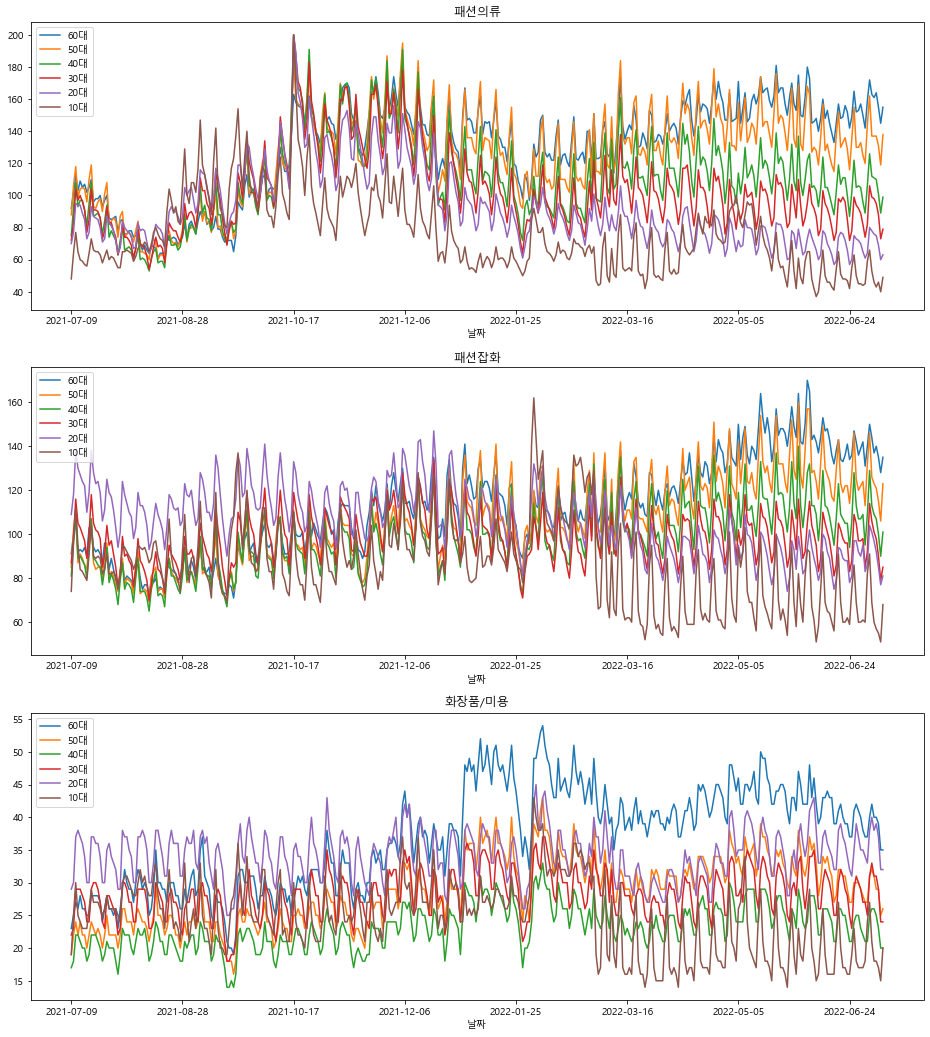

In [11]:
datas = [total_fashion_cloth, total_fashion_acc, total_makeup]
data_names = ['패션의류', '패션잡화', '화장품/미용']

fig = plt.figure(figsize=(16, 18))
for i, data in enumerate(datas):
    ax = plt.subplot(3,1,i+1)
    grouping(data, 'age').plot(ax = ax)
    plt.title(data_names[i])


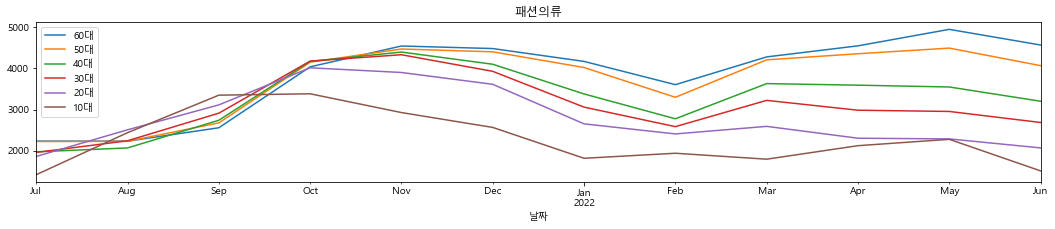

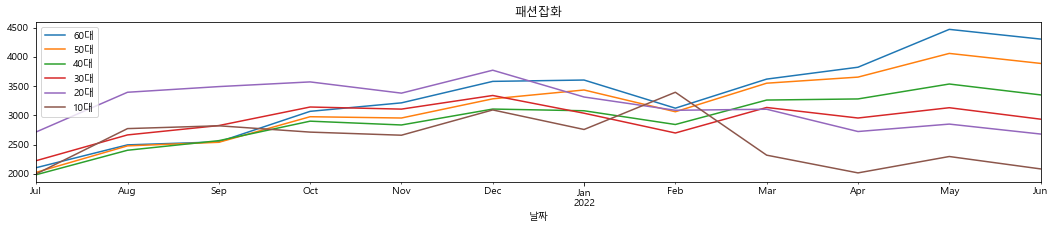

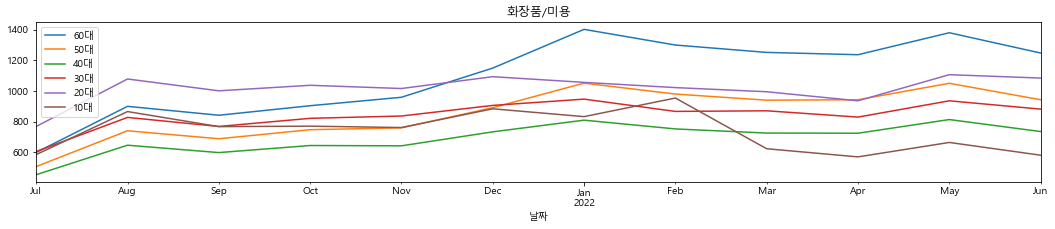

In [12]:
for i in range(3):
    data = datas[i]
    data.index = pd.to_datetime(data.index)
    month_datas = data.to_period('m').reset_index().groupby('날짜').sum()

    fig = plt.figure(figsize=(18, 10))
    ax = plt.subplot(3,1,i+1)
    plt.title(data_names[i])
    grouping(month_datas, 'age').iloc[:-1].plot(ax = ax)

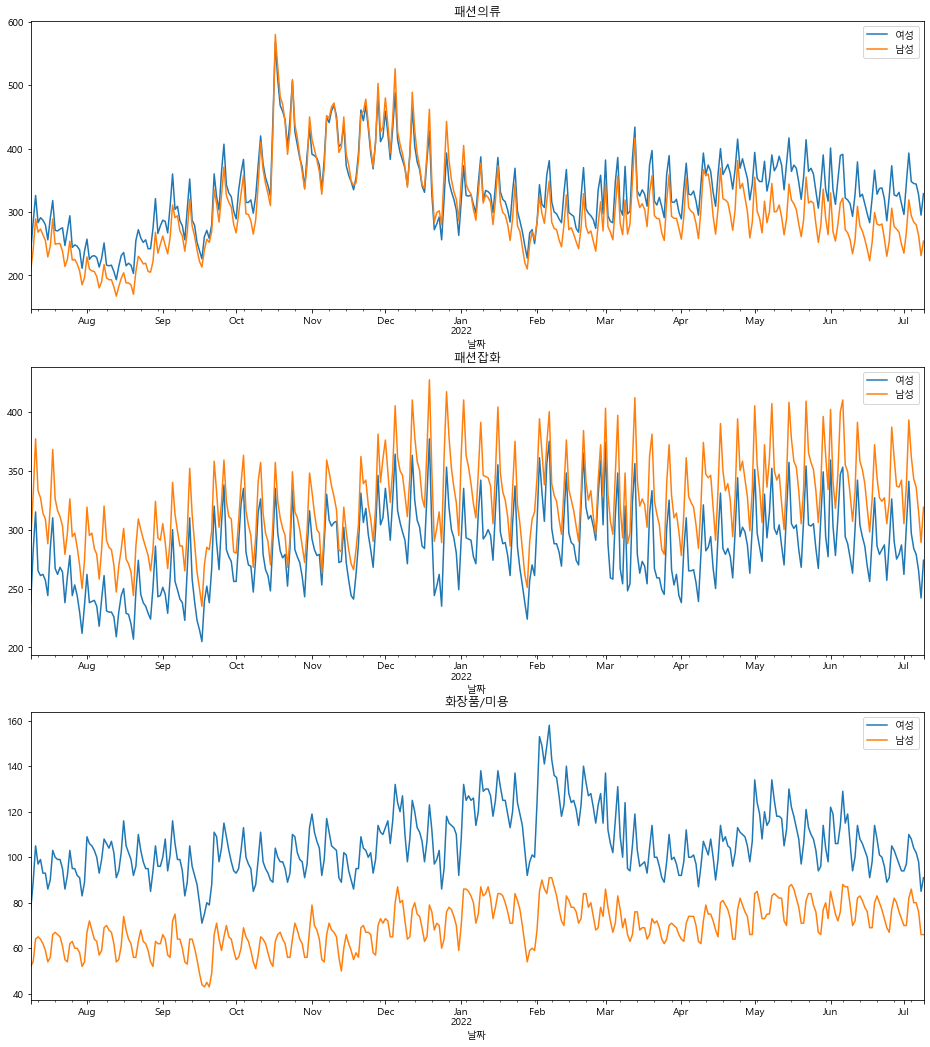

In [13]:
fig = plt.figure(figsize=(16, 18))
for i, data in enumerate(datas):
    ax = plt.subplot(3,1,i+1)
    grouping(data, 'gender').plot(ax = ax)
    plt.title(data_names[i])


In [14]:
total = pd.concat([data.apply(sum, axis = 1) for data in datas], axis = 1)

total.columns = data_names
total

,패션의류,패션잡화,화장품/미용
날짜,,,
2021-07-09,445,527,129
2021-07-10,524,611,143
2021-07-11,615,692,169
2021-07-12,551,598,162
2021-07-13,564,588,163
...,...,...,...
2022-07-05,629,627,184
2022-07-06,624,615,182
2022-07-07,590,580,174


<AxesSubplot:xlabel='날짜'>

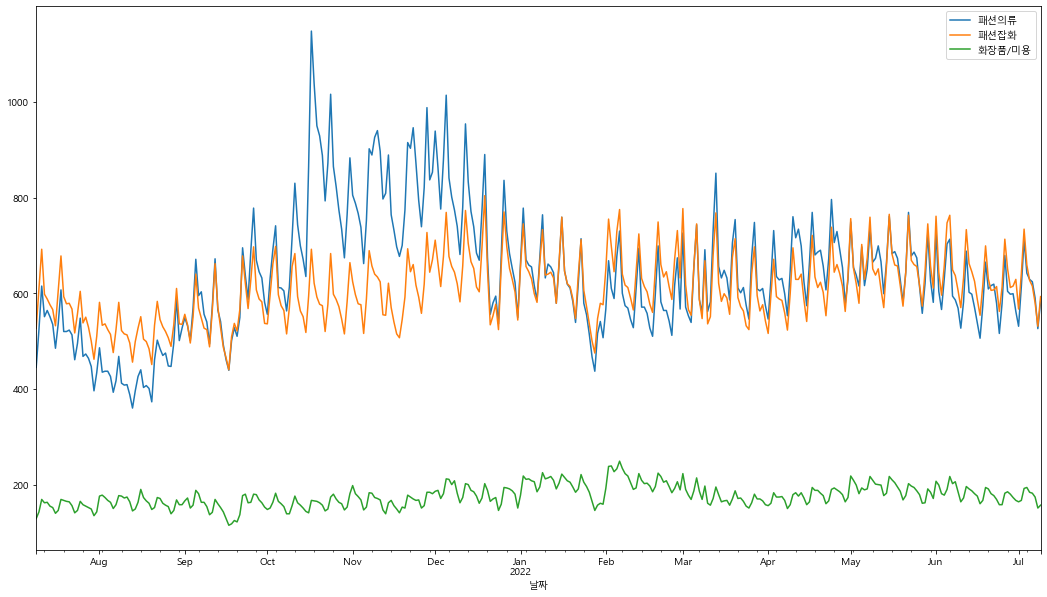

In [15]:
fig = plt.figure(figsize=(18, 10))
ax = plt.subplot(1,1,1)
total.plot(ax = ax)

In [16]:
total.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2021-07-09 to 2022-07-09
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   패션의류    366 non-null    int64
 1   패션잡화    366 non-null    int64
 2   화장품/미용  366 non-null    int64
dtypes: int64(3)
memory usage: 11.4 KB


### 도서 분야 자료 분석

In [25]:
DATA_PATH = './it_book_naver/'

os.listdir(DATA_PATH)

['남성_10대.csv',
 '남성_20대.csv',
 '남성_30대.csv',
 '남성_40대.csv',
 '남성_50대.csv',
 '남성_60대이상.csv',
 '여성_10대.csv',
 '여성_20대.csv',
 '여성_30대.csv',
 '여성_40대.csv',
 '여성_50대.csv',
 '여성_60대이상.csv']

In [26]:
test = pd.read_csv(DATA_PATH + os.listdir(DATA_PATH)[0], skiprows=7, index_col=0)

In [27]:
test

,컴퓨터/IT
날짜,
2021-07-09,17
2021-07-10,18
2021-07-11,10
2021-07-12,17
2021-07-13,16
...,...
2022-07-05,34
2022-07-06,22
2022-07-07,34


In [28]:
total_it = pd.DataFrame(index = test.index)

for file_name in os.listdir(DATA_PATH):
    file = pd.read_csv(DATA_PATH + file_name, skiprows=7, index_col=0)

    total_it.insert(0, file_name.split('.')[0], file[['컴퓨터/IT']])
    

In [29]:
total_it.to_csv('./book_naver/컴퓨터_IT.csv')
total_it

,여성_60대이상,여성_50대,여성_40대,여성_30대,여성_20대,여성_10대,남성_60대이상,남성_50대,남성_40대,남성_30대,남성_20대,남성_10대
날짜,,,,,,,,,,,,
2021-07-09,0,8,8,17,6,29,2,28,20,21,7,17
2021-07-10,14,13,8,13,4,9,6,16,10,11,4,18
2021-07-11,7,7,14,14,5,24,20,18,17,13,6,10
2021-07-12,7,3,15,17,10,20,12,19,23,31,9,17
2021-07-13,7,11,13,16,9,18,8,13,27,26,8,16
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-05,38,14,22,33,10,22,8,22,52,42,13,34
2022-07-06,7,13,19,41,13,13,8,21,39,38,9,22
2022-07-07,14,10,19,35,9,24,32,12,42,29,9,34


In [30]:
grouping(total_it, 'gender')

,여성,남성
날짜,,
2021-07-09,68,95
2021-07-10,61,65
2021-07-11,71,84
2021-07-12,72,111
2021-07-13,74,98
...,...,...
2022-07-05,139,171
2022-07-06,106,137
2022-07-07,111,158


<AxesSubplot:xlabel='날짜'>

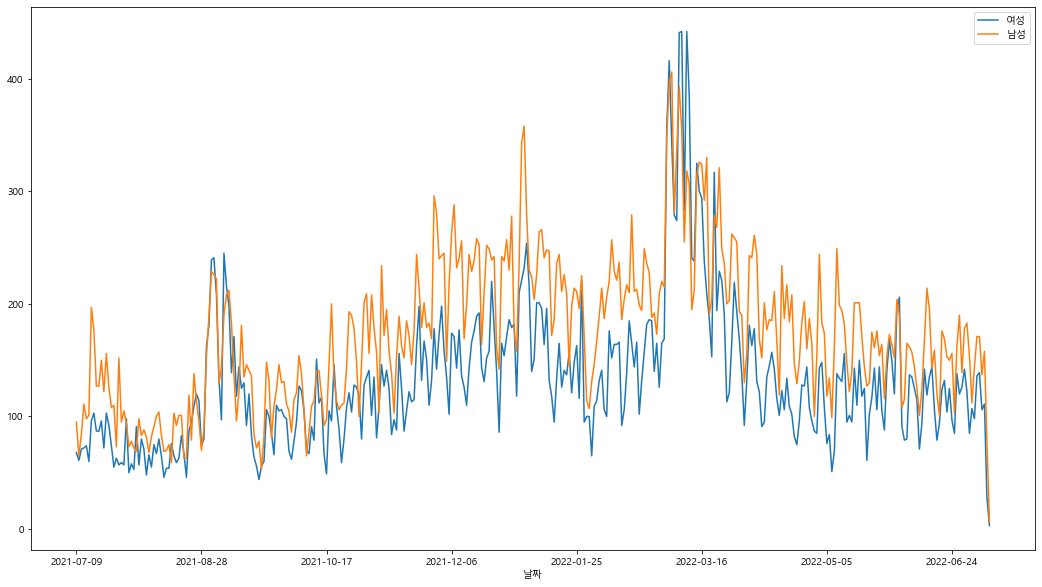

In [31]:
fig = plt.figure(figsize=(18, 10))
ax = plt.subplot(1,1,1)
grouping(total_it, 'gender').plot(ax = ax)

<AxesSubplot:xlabel='날짜'>

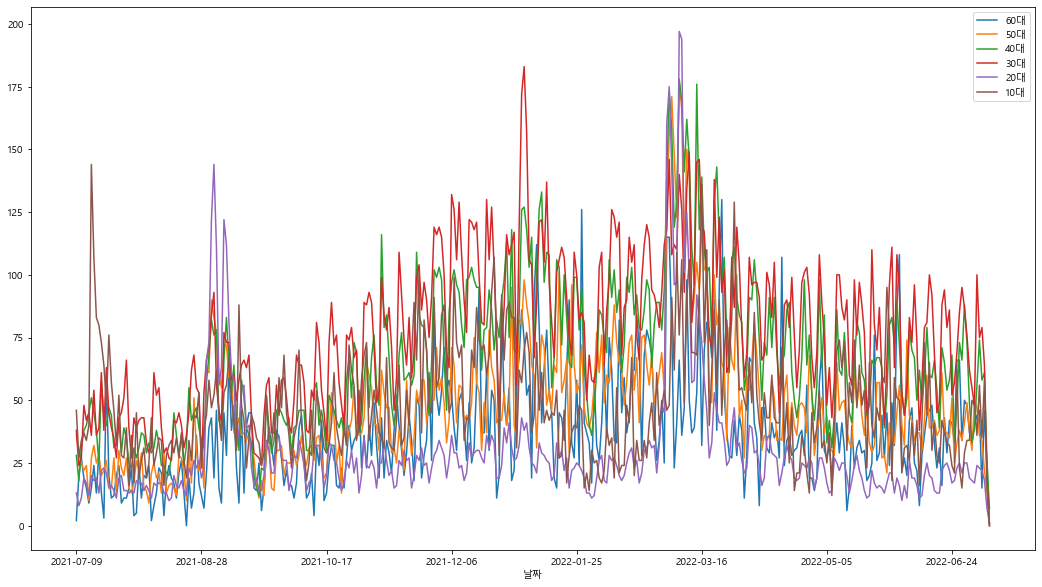

In [32]:
fig = plt.figure(figsize=(18, 10))
ax = plt.subplot(1,1,1)

grouping(total_it, 'age').plot(ax = ax)

<AxesSubplot:xlabel='날짜'>

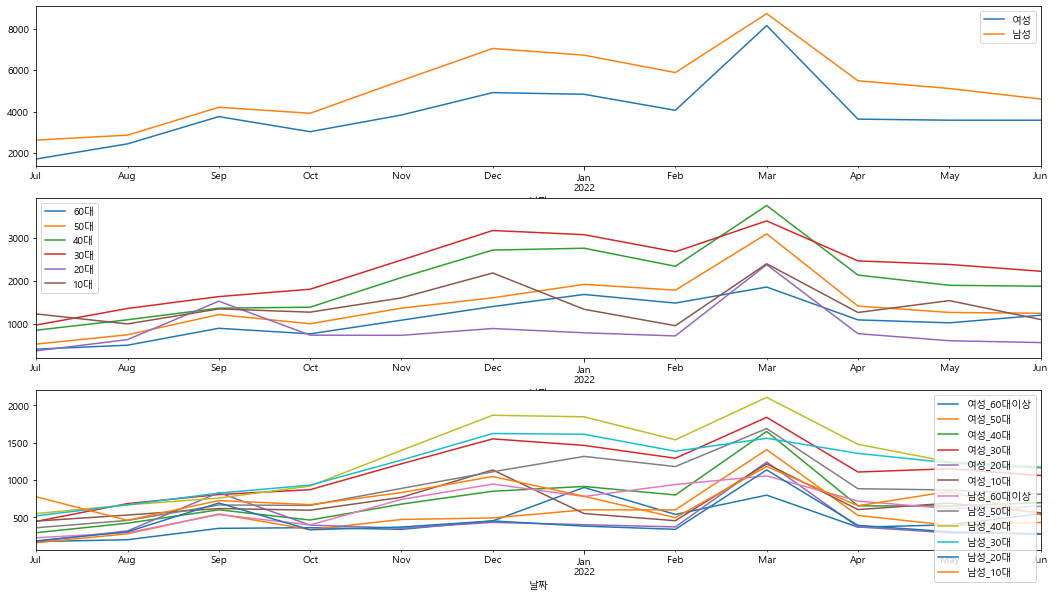

In [33]:
total_it.index = pd.to_datetime(total_it.index)
month_it = total_it.to_period('m').reset_index().groupby('날짜').sum()


fig = plt.figure(figsize=(18, 10))
ax = plt.subplot(3,1,1)
grouping(month_it, 'gender').iloc[:-1].plot(ax = ax)
ax = plt.subplot(3,1,2)
grouping(month_it, 'age').iloc[:-1].plot(ax = ax)
ax = plt.subplot(3,1,3)
month_it.iloc[:-1].plot(ax = ax)

출판 유통 통합 전산망 컴퓨터, 정보기술 분야 데이터 분석

In [34]:
com_tec = pd.read_csv('./book/컴퓨터_정보기술.csv', header = 1, index_col=0)

In [35]:
com_tec.columns = com_tec.columns.str.replace('.1', '_온라인')
com_tec.columns = com_tec.columns.str.replace('.2', '_지역서점')
com_tec.rename(columns = {'부수' : '부수_오프라인', '금액' : '금액_오프라인'}, inplace = True)
com_tec

C:\Users\jhs85\AppData\Local\Temp\ipykernel_20008\444252936.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  com_tec.columns = com_tec.columns.str.replace('.1', '_온라인')
C:\Users\jhs85\AppData\Local\Temp\ipykernel_20008\444252936.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  com_tec.columns = com_tec.columns.str.replace('.2', '_지역서점')


,부수_오프라인,금액_오프라인,부수_온라인,금액_온라인,부수_지역서점,금액_지역서점
21년 07월,"241,679","3,693,278,875","218,380","3,449,668,452",43,"959,700"
21년 08월,"188,126","3,026,557,536","161,778","2,707,255,820",443,"8,937,450"
21년 09월,"129,754","3,054,106,682","100,754","2,357,398,741","1,186","26,346,200"
21년 10월,"91,829","2,112,296,818","63,712","1,449,457,823",924,"19,018,010"
21년 11월,"93,888","2,156,333,031","65,704","1,515,781,703",944,"19,652,155"
21년 12월,"105,583","2,453,762,778","84,377","1,917,146,460","1,274","25,009,495"
22년 01월,"91,048","2,105,971,006","80,306","1,848,050,602","1,030","21,615,020"
22년 02월,"99,791","2,284,195,028","70,983","1,637,549,230",477,"9,444,250"
22년 03월,"165,803","3,911,128,558","112,480","2,658,398,510",530,"9,654,760"
22년 04월,"91,541","2,107,425,326","79,299","1,828,923,420",456,"8,838,420"
